In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/insurance_data (1).csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


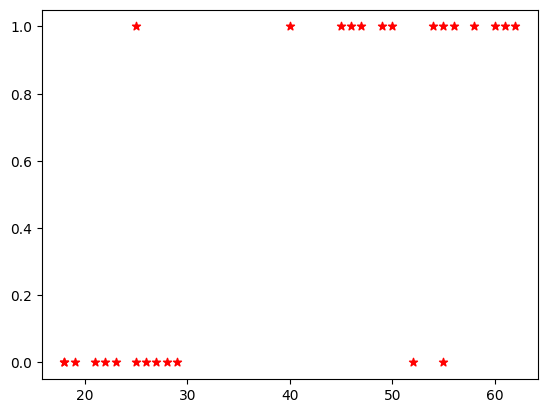

In [ ]:
plt.scatter (data = df , x = 'age' , y = 'bought_insurance',marker = '*',color = 'red')

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test, y_train, y_test =  train_test_split(df[['age']],df.bought_insurance,test_size = .1)

In [ ]:
x_train.shape

(24, 1)

In [ ]:
y_train.head()

4     1
8     1
17    1
26    0
23    1
Name: bought_insurance, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model .predict(x_test)

array([1, 0, 1])

In [ ]:
y_test

5     1
10    0
24    1
Name: bought_insurance, dtype: int64

In [ ]:
model.score(x_test,y_test)

1.0

# Decision Tree Classifier

In [ ]:
df = pd.read_csv('/content/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
input = df.drop('salary_more_then_100k',axis = 1)
target = df['salary_more_then_100k']

In [ ]:
input

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [ ]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()


In [ ]:
input['company_n']= le_company.fit_transform(input['company'])
input['job_n']= le_job.fit_transform(input['job'])
input['degree_n']= le_degree.fit_transform(input['degree'])

In [ ]:
input.head()

,company,job,degree,company_n,job_n,degre_n,degree_n
0,google,sales executive,bachelors,2,2,0,0
1,google,sales executive,masters,2,2,1,1
2,google,business manager,bachelors,2,0,0,0
3,google,business manager,masters,2,0,1,1
4,google,computer programmer,bachelors,2,1,0,0


In [ ]:
input_n = input[['company_n','job_n','degree_n']]

In [ ]:
input_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(input_n,target)

DecisionTreeClassifier()

In [ ]:
model.predict([[2,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# Decision Tree Exercise ( Titanic Survival)

In [ ]:
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
input = df[['Pclass','Sex','Age','Fare']]
target = df['Survived']

In [ ]:
input.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [ ]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
input.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [ ]:
input.Age.fillna(input.Age.mean(),inplace = True)

<ipython-input-71-f9922baf7b36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input.Age.fillna(input.Age.mean(),inplace = True)


In [ ]:
input.Sex = input.Sex.map({'male':1 , 'female':2})

<ipython-input-78-873370601d6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input.Sex = input.Sex.map({'male':1 , 'female':2})


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input,target,test_size = .2)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
model.score(x_test,y_test)

0.7932960893854749